In [325]:
#all the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as statsmod

In [326]:
car_sales = pd.read_csv("toyota.csv")

In [327]:
print(car_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
None


# **Data validation**

I have received this dataset: 6738 cars sold in the past 6 months. Electric cars do not pay road tax. There are not apparent missing data in this dataset. I'm switching the 2 columns into categorical to gain some space and will explore what information I can gather from this dataset.

  Column    |    Non-Null Count | Dtype  
  ------    |    -------------- |   -----  
  model  |    6738 non-null  |  object 
  year   |    6738 non-null  |  int64  
  price  |    6738 non-null  |  int64  
  transmission | 6738 non-null |  object 
  mileage |   6738 non-null | int64  
  fuelType |  6738 non-null  |  object 
  tax    |    6738 non-null  |  int64  
  mpg    |    6738 non-null  |  float64
  engineSize  |  6738 non-null  | float64

## **Columns "model" and "fuelType**

Models : ' Auris', ' Avensis', ' Aygo', ' C-HR', ' Camry', ' Corolla', ' GT86',
       ' Hilux', ' IQ', ' Land Cruiser', ' PROACE VERSO', ' Prius', ' RAV4',
       ' Supra', ' Urban Cruiser', ' Verso', ' Verso-S', ' Yaris'

Fuel types : 'Diesel', 'Hybrid', 'Other', 'Petrol'

I made a table crosstab to see the type of fuel each of our models offer.

Model       |   Diesel | Hybrid | Other | Petrol
--------    |  ------- | ------ | ----- | -----                                                         
Auris       |       42 |    498 |     1 |    171
Avensis     |       76 |      0 |     0 |     39
Aygo        |        0 |      0 |    59 |   1902
C-HR        |        0 |    352 |     7 |    120
Camry       |        0 |     11 |     0 |      0
Corolla     |        1 |    181 |     2 |     83
GT86        |        0 |      0 |     0 |     73
Hilux       |       86 |      0 |     0 |      0
IQ          |        0 |      0 |     0 |      8
Land Cruiser|       51 |      0 |     0 |      0
PROACE VERSO |      15 |      0 |     0 |      0
Prius       |        0 |    214 |    18 |      0
RAV4        |      180 |    230 |     5 |     58
Supra       |        0 |      0 |     1 |     11
Urban Cruiser |      1 |      0 |     0 |      3
Verso       |       29 |      0 |     2 |     83
Verso-S     |        0 |      0 |     0 |      3
Yaris       |       22 |    557 |    10 |   1533


3 models were only diesel: Hilux, Land Cruiser, PROACE VERSO

In [328]:
car_sales[["model","fuelType","transmission"]] = car_sales[["model","fuelType","transmission"]].astype("category")
models = car_sales["model"].cat.categories
fuel_types = car_sales["fuelType"].cat.categories
nb_fuelType_per_model = pd.crosstab(car_sales["model"], car_sales["fuelType"])

In [329]:
car_sales[["fuelType", "model", "transmission"]] = car_sales[["fuelType", "model", "transmission"]].astype("category")
print(car_sales["fuelType"].cat.categories)

Index(['Diesel', 'Hybrid', 'Other', 'Petrol'], dtype='object')


In [330]:
print(car_sales["fuelType"].value_counts())

fuelType
Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: count, dtype: int64


## **Column "year"**



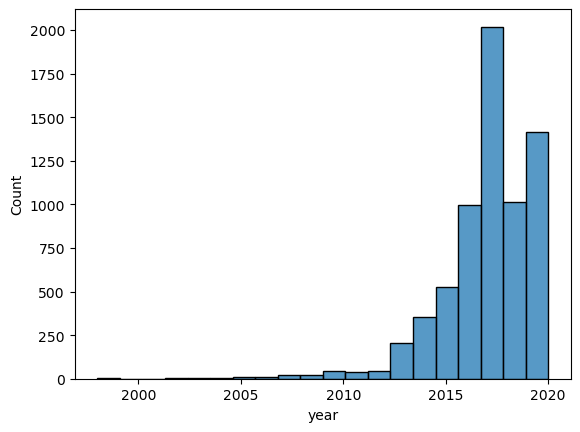

2021.0
2013.0
[1998, 1]
[2020, 128]


In [331]:
#year
sns.histplot(car_sales["year"], bins=20)
plt.show()

#outliers

def outliers(data,column) :
    summary_stat = data[column].describe()
    IQR = summary_stat["75%"] - summary_stat["25%"]
    upper = summary_stat["75%"] + 1.5*IQR
    lower = summary_stat["25%"] - 1.5*IQR
    return upper , lower

upper_year, lower_year = outliers(car_sales,"year")
print(upper_year)
print(lower_year)

#Function to quickly find the cars that have minimum and maximum cell values
def min_max(data,column):
    minimum = []
    min = data[column].min()
    min_l = len(data[data[column] == min])
    minimum.append(min)
    minimum.append(min_l)
    maximum = []
    max = data[column].max()
    max_l = len(data[data[column] == max])
    maximum.append(max)
    maximum.append(max_l)
    return minimum, maximum

min_year , max_year = min_max(car_sales, "year")
print(min_year)
print(max_year)

In [332]:
summary_year_fuelType = car_sales.groupby("fuelType")["year"].describe()
print(summary_year_fuelType)

           count         mean       std     min     25%     50%     75%  \
fuelType                                                                  
Diesel     503.0  2015.546720  2.922182  1998.0  2014.0  2016.0  2017.0   
Hybrid    2043.0  2016.795888  1.775594  2005.0  2016.0  2017.0  2018.0   
Other      105.0  2017.057143  1.905602  2008.0  2016.0  2017.0  2018.0   
Petrol    4087.0  2016.864204  2.257832  1999.0  2016.0  2017.0  2018.0   

             max  
fuelType          
Diesel    2020.0  
Hybrid    2020.0  
Other     2020.0  
Petrol    2020.0  


C:\Users\Angelique\AppData\Local\Temp\ipykernel_15244\2678331185.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_year_fuelType = car_sales.groupby("fuelType")["year"].describe()


We have a left skewd distribution. with one very old car. Let's the attributs of this old car.

In [333]:
oldest_car = car_sales[car_sales["year"] == min_year[0]]
print(oldest_car)

              model  year  price transmission  mileage fuelType  tax   mpg  \
6694   Land Cruiser  1998  19990       Manual   100000   Diesel  265  23.9   

      engineSize  
6694         4.2  


## **The "price" column**

Interestingly, the oldest car wasn't the cheapest. It was actually sold at a price higher than both the median and the mean. What were therefore the arguments to sale this car at this price? This is a question we need to consider in our analysis.

The mean price is higher than the median suggesting a heaviest influence of expensive car. Let's the attributes of the most expensive car.

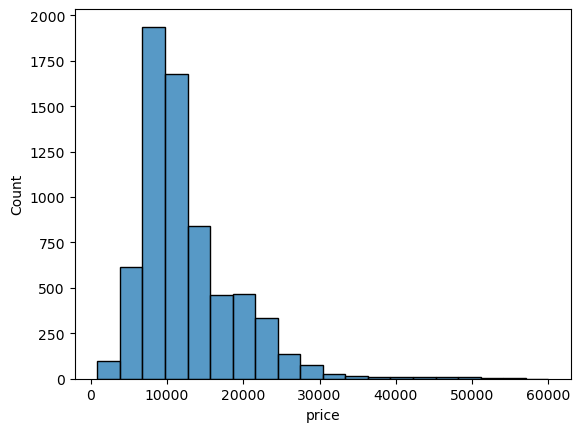

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64


In [334]:
#visu "price"
sns.histplot(car_sales["price"], bins=20)
plt.show()

#description
print(car_sales["price"].describe())

In [335]:
min_price , max_price = min_max(car_sales,"price")
cheapest_car = car_sales[car_sales["price"] == min_price[0]]
most_exp_car = car_sales[car_sales["price"] == max_price[0]]

print(most_exp_car)
print(cheapest_car)

       model  year  price transmission  mileage fuelType  tax   mpg  \
6711   Supra  2019  59995    Automatic     9909    Other  150  34.5   

      engineSize  
6711         3.0  
         model  year  price transmission  mileage fuelType  tax   mpg  \
6427   Avensis  2003    850       Manual   167054   Diesel  205  48.7   

      engineSize  
6427         2.0  


The most expensive car in our dataset is a Toyota Supra model 2019. It's a sport car. It consumes more fuel than our old Land cruiser. It's an automatic which is a bit weird. One would think that you buy a sport car to enjoy riding it and therefore you would prefer a manual. 
The cheapest car is a Toyota Avensis (850GBP) model 2003. I'm not an expert, but I believe this is way too cheap for this model. Let's see if we can find other Avensis.

In [336]:
car_sales["model"] = car_sales["model"].str.strip()
Avensis_cars = car_sales[car_sales["model"] == "Avensis"]
print(len(Avensis_cars))

115


We only have one Avensis model 2003. However, we have sold 115 Avensis cars enough to see the median and average price.

count      115.000000
mean      9884.356522
std       3376.061580
min        850.000000
25%       7950.000000
50%      10275.000000
75%      12396.500000
max      16495.000000
Name: price, dtype: float64


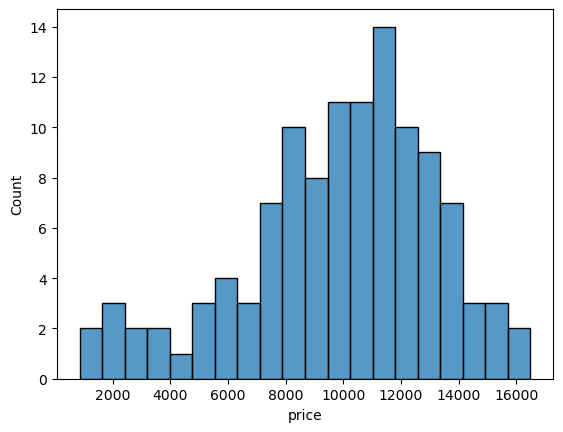

fuelType
Diesel     9775.0
Hybrid        NaN
Other         NaN
Petrol    12498.0
Name: price, dtype: float64


C:\Users\Angelique\AppData\Local\Temp\ipykernel_15244\1044094373.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(Avensis_cars.groupby("fuelType")["price"].median())


In [337]:
print(Avensis_cars["price"].describe())

#visu
sns.histplot(Avensis_cars["price"], bins=20)
plt.show()

print(Avensis_cars.groupby("fuelType")["price"].median())

Based on the summary stat above, I'm pretty confident that a 0 is missing in our cheapest model. I will not remove this row but rather add a 0 int the price (switch from 850GBP to 8500GBP). However, I will notify the sale team in case someone sold this car to friend at this correct very cheap price.

In [338]:
#rectifying the price of the cheapest Avensis
car_sales["price"] = car_sales["price"].replace(850,8500)
print(car_sales["price"].min())


899


I have now another cheap price (this cleaning never ends :) ). Now the cheapest car was sold for 899GBP.

In [339]:
cheap , expsive = min_max(car_sales,"price")
cheapests = car_sales[car_sales["price"] == cheap[0]]
print(cheapests)

       model  year  price transmission  mileage fuelType  tax   mpg  \
289  Corolla  2001    899    Automatic    76000   Petrol  300  35.3   

     engineSize  
289         1.6  


It's a Toyota corolla. Based on the crosstab there are 83 Corollas running on petrol. Enough to compare the average price with this cheap one. It's not a bas car at all so there is no reason for such a low price

In [340]:
corollas = car_sales[car_sales["model"] == "Corolla"]
petrol_corollas = corollas[corollas["fuelType"] == "Petrol"]
stat_corrola_petrol_price = petrol_corollas["price"].describe()
print(stat_corrola_petrol_price)

count       83.000000
mean     16280.626506
std       5168.428866
min        899.000000
25%      16490.000000
50%      17790.000000
75%      18990.000000
max      23495.000000
Name: price, dtype: float64


**Summary statistic of the prices of Corolla running on petrol**

Method | Values
------ | ------
count  |     83.000000
mean   |  16280.626506
std    |   5168.428866
min    |    899.000000
25%    |  16490.000000
50%    |  17790.000000
75%    |  18990.000000
max    |  23495.000000

The mean is < to the median. Our cheapest Corolla is still cheap if we multiply by 10 its value (8990). As I said above it is a good car because it doesn't consume much (low mpg) but we will see in detail later. 
Therefore, I will remove this raw.

In [341]:
print(cheapests)
to_be_removed = car_sales.iloc[289]
car_sales.drop(index=289, axis=0, inplace=True)
upper_price , lower_price = outliers(car_sales,"price")
cars_lower = car_sales[car_sales["price"] <= 1000]
print(cars_lower)

       model  year  price transmission  mileage fuelType  tax   mpg  \
289  Corolla  2001    899    Automatic    76000   Petrol  300  35.3   

     engineSize  
289         1.6  
      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
2447  Yaris  2002    950       Manual   104000   Petrol  200  40.4         1.5
2635  Yaris  2003    975       Manual   107000   Petrol  145  50.4         1.0


## **Column "transmission"**


In [342]:
print(car_sales["transmission"].cat.categories)

Index(['Automatic', 'Manual', 'Other', 'Semi-Auto'], dtype='object')


## **Mileage**

Summary statistic:

Method  |  Values
-----   |  ------
count   |   6737.000000
mean    |  22849.525753
std     |  19115.919007
min     |      2.000000
25%     |   9446.000000
50%     |  18512.000000
75%     |  31060.000000
max     | 174419.000000

I can a minimum of 2km. Let's see how many of these non-sense are there.

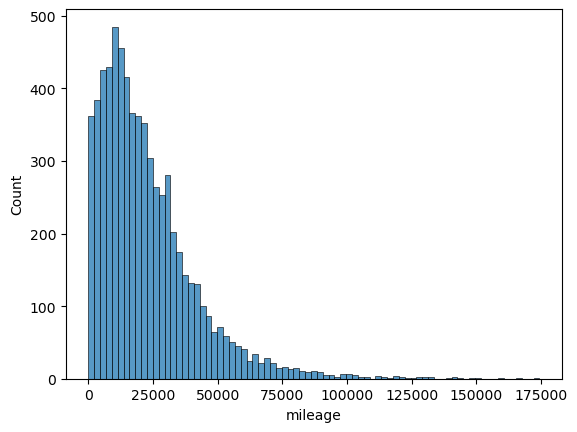

In [343]:
sns.histplot(car_sales["mileage"])
plt.show()

In [344]:
too_low_mileage = car_sales[car_sales["mileage"] < 100]
print(too_low_mileage)

             model  year  price transmission  mileage fuelType  tax   mpg  \
165        Corolla  2019  16990       Manual       25   Petrol  145  39.2   
201        Corolla  2020  28000    Automatic       10   Hybrid  140  56.5   
267        Corolla  2019  23995    Automatic       42   Hybrid  135  57.7   
274        Corolla  2019  17999       Manual       20   Petrol  145  39.2   
275        Corolla  2019  17499       Manual       20   Petrol  145  39.2   
...            ...   ...    ...          ...      ...      ...  ...   ...   
6647  PROACE VERSO  2019  25200       Manual       10   Diesel  145  40.4   
6684  Land Cruiser  2020  47885    Automatic        4   Diesel  145  30.1   
6687  Land Cruiser  2020  45950    Automatic       27   Diesel  145  30.1   
6702         Supra  2019  47500    Semi-Auto        5   Petrol  145  34.5   
6708         Supra  2019  49499    Automatic       10   Petrol  145  34.5   

      engineSize  
165          1.2  
201          1.8  
267          1.8  

In [345]:
summary_mileage = car_sales["mileage"].describe()
print(summary_mileage)

count      6737.000000
mean      22849.525753
std       19115.919007
min           2.000000
25%        9446.000000
50%       18512.000000
75%       31060.000000
max      174419.000000
Name: mileage, dtype: float64


## **Column "tax"**



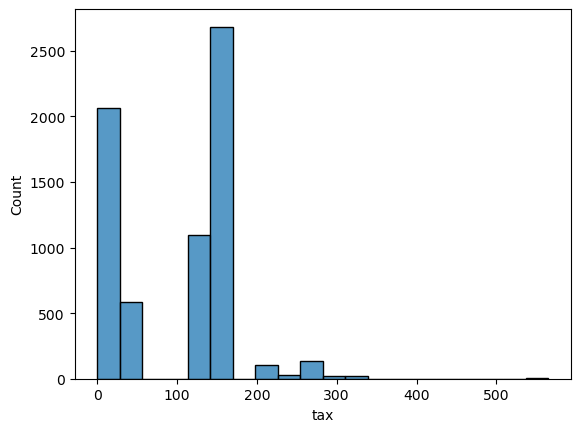

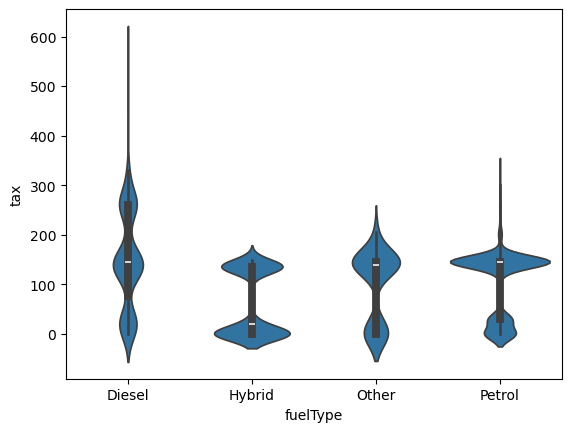

           count        mean        std  min   25%    50%    75%    max
fuelType                                                               
Diesel     503.0  149.174950  97.888898  0.0  77.5  145.0  260.0  565.0
Hybrid    2043.0   60.127264  66.307452  0.0   0.0   20.0  135.0  150.0
Other      105.0  100.523810  69.024535  0.0   0.0  140.0  145.0  205.0
Petrol    4086.0  105.075869  66.507611  0.0  30.0  145.0  145.0  330.0
             model  year  price transmission  mileage fuelType  tax   mpg  \
6686  Land Cruiser  2008   6950    Automatic   174419   Diesel  565  31.4   

      engineSize  
6686         3.0  


C:\Users\Angelique\AppData\Local\Temp\ipykernel_15244\1690018652.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_tax = car_sales.groupby("fuelType")["tax"].describe()


In [346]:
sns.histplot(car_sales["tax"], bins=20)
plt.show()

sns.violinplot(x="fuelType", y="tax", data=car_sales)
plt.show()

summary_tax = car_sales.groupby("fuelType")["tax"].describe()
print(summary_tax)
max_tax = car_sales[car_sales["tax"] == 565]
print(max_tax)

fuelType | count  |    mean    |    std | min |  25%  |  50%  |  75%  |  max
-------  | -----  |  --------  |  ----  | --- | ----- | ---- | ----- | ----
Diesel   |  503.0 | 149.174950 | 97.888898 | 0.0 | 77.5 | 145.0 | 260.0 | 565.0
Hybrid   | 2043.0 |  60.127264 | 66.307452 | 0.0 |  0.0 |  20.0 | 135.0 | 150.0
Other    |  105.0 | 100.523810 | 69.024535 | 0.0 |  0.0 | 140.0 | 145.0 | 205.0
Petrol   | 4086.0 | 105.075869 | 66.507611 | 0.0 | 30.0 |145.0  | 145.0 | 330.0

They all have a minimum of 0 GBP of road tax. Although the median is the same between petrol and diesel, the mean is higher for the diesel cars. The hybrid will be our reference to compare to as no e-cars have been sold in the last 6 months.

## **the column "mpg"**


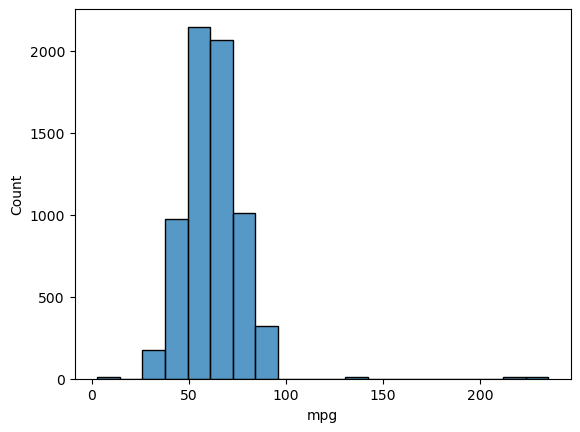

In [347]:
sns.histplot(car_sales["mpg"], bins=20)
plt.show()

It looks like a normal distribution (symetrical around the mean). We can see what seems to me an aberrant mpg (>200 mpg)

In [348]:
summary_mpg = car_sales["mpg"].describe()
print(summary_mpg)
print(car_sales[car_sales["mpg"] == 235])

count    6737.000000
mean       63.046341
std        15.834278
min         2.800000
25%        55.400000
50%        62.800000
75%        69.000000
max       235.000000
Name: mpg, dtype: float64
      model  year  price transmission  mileage fuelType  tax    mpg  \
6098  Prius  2017  20795    Automatic     3881   Hybrid  135  235.0   
6103  Prius  2018  20495    Automatic    16347   Hybrid  140  235.0   
6116  Prius  2017  19998    Automatic    13476   Hybrid  140  235.0   
6118  Prius  2019  24987    Automatic     6552   Hybrid  135  235.0   
6124  Prius  2020  27990    Automatic     1500   Hybrid  135  235.0   
6134  Prius  2017  20998    Automatic    17681   Hybrid  135  235.0   
6200  Prius  2018  19072    Automatic    43584   Hybrid  135  235.0   
6207  Prius  2019  22495    Automatic    13772   Hybrid  135  235.0   
6216  Prius  2018  22890    Automatic    31786   Hybrid  135  235.0   
6223  Prius  2018  18699    Automatic    34502   Hybrid  140  235.0   
6236  Prius  2019  21500 

They are actually all hybrids which now make sense, they use both electricity and gas to achieve such a distance.



In [349]:
#the least efficient
lowest_mpg = car_sales[car_sales["mpg"] == 2.8]
print(lowest_mpg)

      model  year  price transmission  mileage fuelType  tax  mpg  engineSize
6552  Hilux  2019  28495    Automatic     3350   Diesel  260  2.8         2.4
6562  Hilux  2020  18495       Manual       50   Diesel  260  2.8         2.4
6563  Hilux  2020  23495       Manual      100   Diesel  260  2.8         2.4
6575  Hilux  2019  26500    Automatic     7123   Diesel  260  2.8         2.4
6576  Hilux  2019  20500       Manual     5190   Diesel  260  2.8         2.4
6583  Hilux  2019  26995    Automatic        4   Diesel  265  2.8         2.4
6594  Hilux  2020  39257    Automatic     1259   Diesel  265  2.8         2.4
6595  Hilux  2019  27850    Automatic    10250   Diesel  260  2.8         2.4
6596  Hilux  2020  30500    Automatic     5000   Diesel  260  2.8         2.4
6617  Hilux  2020  36995    Automatic      150   Diesel  260  2.8         2.4


The Hilux is a truck. It consumes a lot of fuel. I will put it apart in the analysis. 

## **Column "engineSize"**

the larger an engine is, the more fuel it will use and therefore the more emission it will produce

In [350]:
summary_engine_size = car_sales["engineSize"].describe()
print(summary_engine_size)

count    6737.000000
mean        1.471278
std         0.436188
min         0.000000
25%         1.000000
50%         1.500000
75%         1.800000
max         4.500000
Name: engineSize, dtype: float64


In [351]:
max_engine = car_sales[car_sales["engineSize"] == 4.5]
print(max_engine)

             model  year  price transmission  mileage fuelType  tax   mpg  \
6698  Land Cruiser  2014  44990    Automatic    60000   Diesel  540  29.7   

      engineSize  
6698         4.5  


It was also a Land Cruiser who had the higher tax (565). A Land cruiser is a SUV.

# **Analysis**

We are looking for a good strategy to attract clients into buying e-cars. However, we haven'T sold any e-cars yet but we can use the hybrids as our equivalent. And I am going to see what was the pattern. I'm going to check if I can see a difference in the data compared to the other models. I will start with the road tax as it is the most obvious advantage for a e-car.

## **Analysis of the price**
Are our hybrids actually more expensive than our petrol cars?

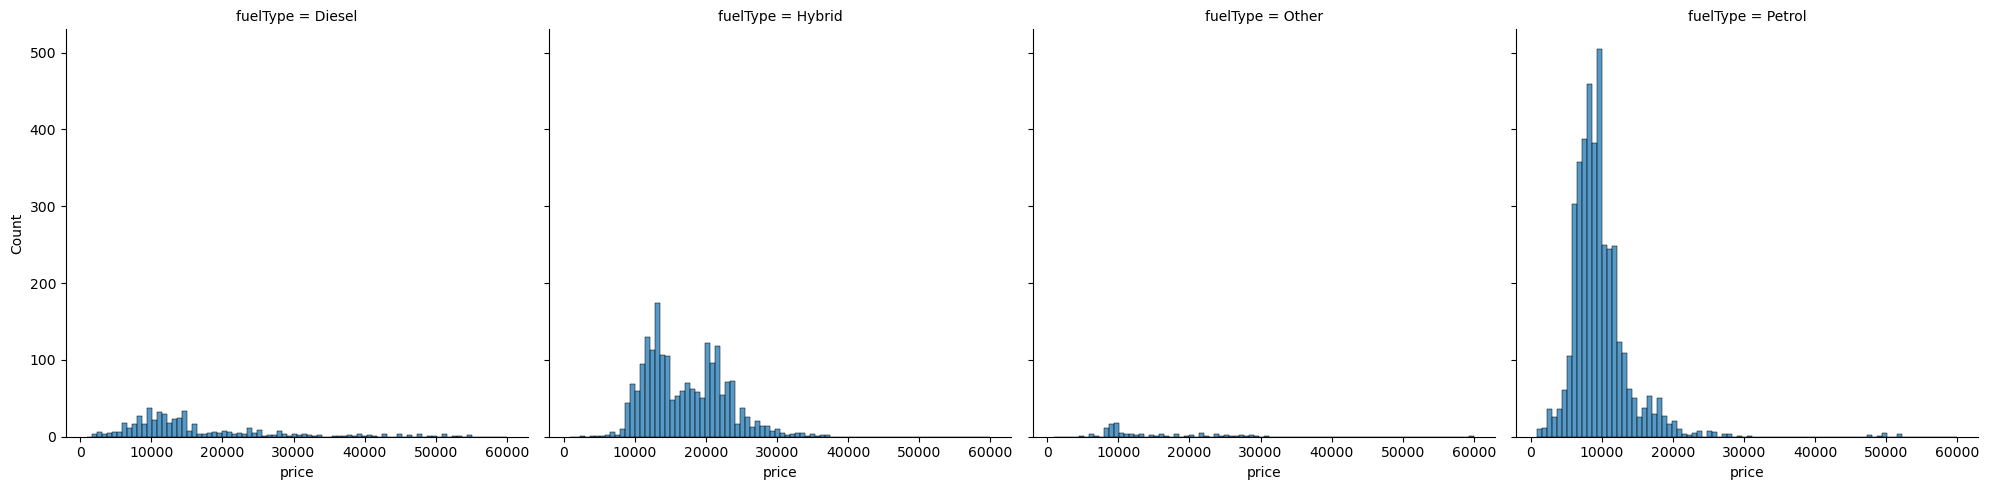

In [352]:
Diesels = car_sales[car_sales["fuelType"] == "Diesel"]
Hybrids = car_sales[car_sales["fuelType"] == "Hybrid"]
Petrols = car_sales[car_sales["fuelType"] == "Petrol"]
Others = car_sales[car_sales["fuelType"] == "Other"]

#price
sns.displot(x="price", data=car_sales, col="fuelType")
plt.show()

In [353]:
summary_price_fuelType = car_sales.groupby("fuelType")["price"].describe()
print(summary_price_fuelType)

           count          mean           std     min      25%      50%  \
fuelType                                                                 
Diesel     503.0  15713.015905  10192.084714  1985.0   9568.5  12499.0   
Hybrid    2043.0  17185.472834   5485.107086  2495.0  12750.0  16490.0   
Other      105.0  14121.161905   8010.610464  4995.0   9095.0  10250.0   
Petrol    4086.0   9761.706314   4132.465075   950.0   7395.5   8998.0   

              75%      max  
fuelType                    
Diesel    18628.5  54991.0  
Hybrid    21250.0  37440.0  
Other     18000.0  59995.0  
Petrol    10998.0  51995.0  


C:\Users\Angelique\AppData\Local\Temp\ipykernel_15244\2245834926.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_price_fuelType = car_sales.groupby("fuelType")["price"].describe()


The answer is definitely yes no need to do a statistical test for that

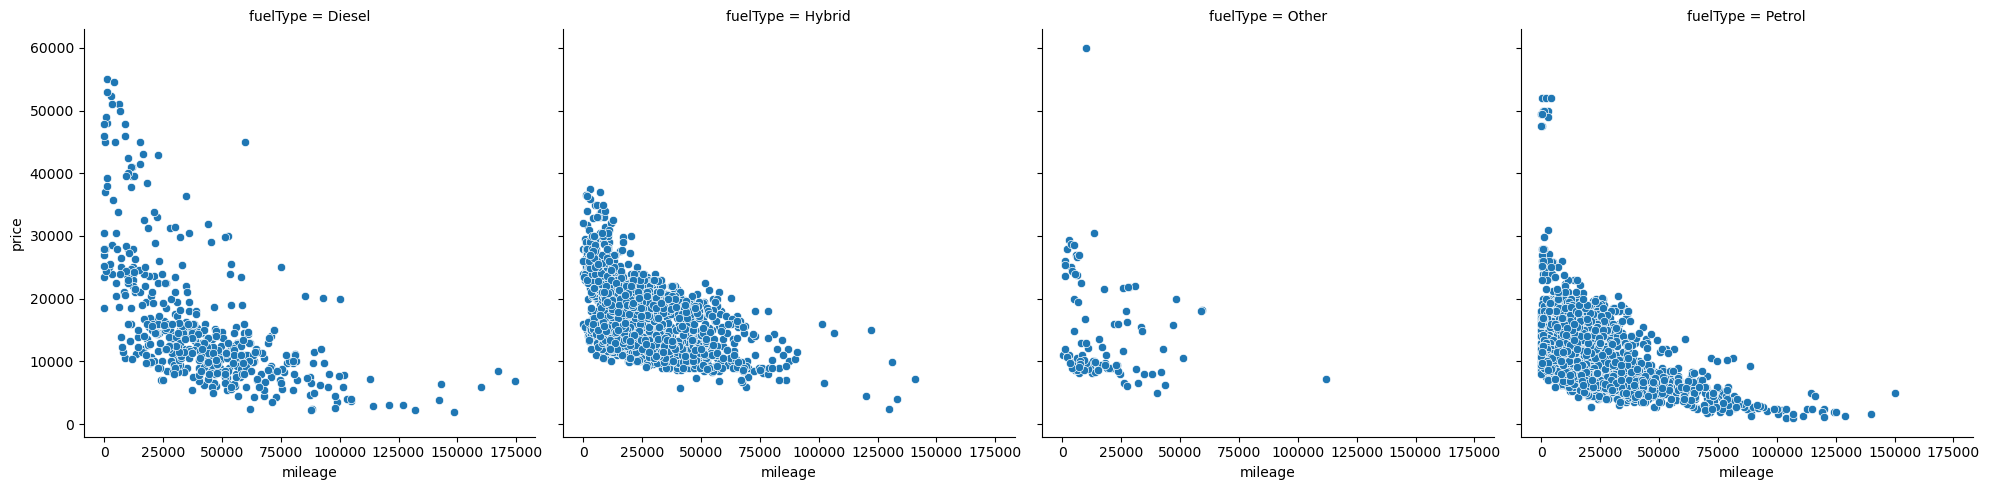

In [354]:
#price vs mileage
sns.relplot(x="mileage", y="price", data=car_sales, col="fuelType")
plt.show()